In [1]:
# The program reads the free energy and diffusion matrix data generated by 
# LJ7in2D_bicubic_binning.c and LJ7in2D_diffusion_matrix.c respectively.
# The data: 
# 1. The parameter file bicubic_params.txt
# Format:
# 	fprintf(fpar,"%i\n",N1);
# 	fprintf(fpar,"%i\n",N2);
# 	fprintf(fpar,"%.10e\n",h1);
# 	fprintf(fpar,"%.10e\n",h2);
# 	fprintf(fpar,"%.10e\n",*val1_min);
# 	fprintf(fpar,"%.10e\n",*val1_max);
# 	fprintf(fpar,"%.10e\n",*val2_min);
# 	fprintf(fpar,"%.10e\n",*val2_max);

# 2. The free energy data file sprintf(fname,"LJ7free_energy_beta%.0f.txt",BETA); N2-by-N1 array

# 3. The bicubic matrix data file sprintf(fname,"LJ7free_energy_bicubic_matrix_beta%.0f.txt",BETA);
# Format:
# 	for( j = 0; j < N2; j++ ) {
# 		for( i=0; i < N1; i++ ) {
# 			ind = i + j*N1;
# 			compute_bicubic_coeff_matrix(FE,grid_der1,grid_der2,grid_der12,
# 				bicubic_matrix,ind);
# 			for( n=0; n < 16; n++ ) {
# 				fprintf(fpot,"%.4e\t",bicubic_matrix[ind*16 + n]);
# 			}	
# 			fprintf(fpot,"\n");
# 		}
# 	}
#
# 4. The diffusion matrix data files
#	sprintf(fname,"LJ7_M11_beta%.0f.txt",BETA);
#	sprintf(fname,"LJ7_M12_beta%.0f.txt",BETA);
#	sprintf(fname,"LJ7_M22_beta%.0f.txt",BETA);
#
# 5. The bicubic matrix data files for evaluating the diffusion matrix at any point in the CV space:
#
#	sprintf(fname,"LJ7_M11_bicubic_matrix_beta%.0f.txt",BETA);
#	sprintf(fname,"LJ7_M12_bicubic_matrix_beta%.0f.txt",BETA);
#	sprintf(fname,"LJ7_M22_bicubic_matrix_beta%.0f.txt",BETA);

# The matrix in indexed columnwise: the first column has indices 0,1,2,3, the second one -- 4,5,6,7, etc.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files

In [3]:
def read_FEdata_files(beta):
    fname = "Data/LJ7free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ7free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix



def read_Mdata_files(entry,beta):
    fname = "Data/LJ7_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ7_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix
    

In [4]:
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y
    

In [5]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)

129
129
1.1861825483e-02
2.0958537375e-02
3.5641415247e-02
1.5539550771e+00
 -1.2272675356e+00
1.4554252484e+00
129
129
0.011861825483
0.020958537375
0.035641415247
1.5539550771
-1.2272675356
1.4554252484


In [6]:
# read data files
beta = 5
FE5, bicubic_matrix5 = read_FEdata_files(beta)
M11_5, M11_bicubic_matrix5 = read_Mdata_files(11,beta)
M12_5, M12_bicubic_matrix5 = read_Mdata_files(12,beta)
M22_5, M22_bicubic_matrix5 = read_Mdata_files(22,beta)

beta = 10
FE10, bicubic_matrix10 = read_FEdata_files(beta)
M11_10, M11_bicubic_matrix10 = read_Mdata_files(11,beta)
M12_10, M12_bicubic_matrix10 = read_Mdata_files(12,beta)
M22_10, M22_bicubic_matrix10 = read_Mdata_files(22,beta)


(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [7]:
# visualize the free energy
mu2grid = np.linspace(val1_min,val1_max,N1)
mu3grid = np.linspace(val2_min,val2_max,N1)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel(r'$\mu_2$')
    plt.ylabel(r'$\mu_3$')
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

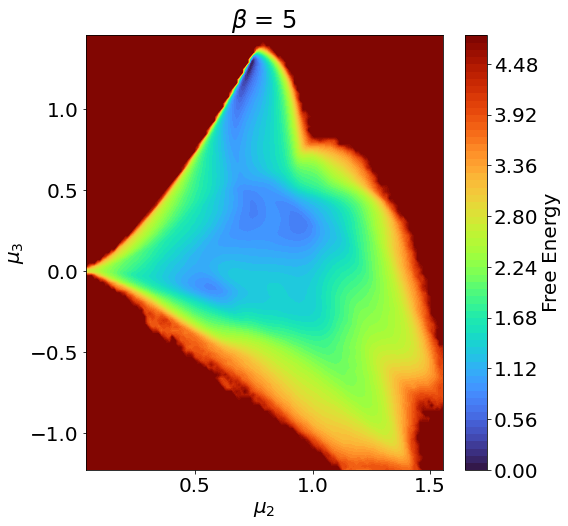

In [8]:
beta = 5
fig_name = "Figures/FE_LJ7in2Dbeta" + str(beta) + "_binning.pdf"
contourf_func(FE5,5,mu2grid,mu3grid,"Free Energy",fig_name)

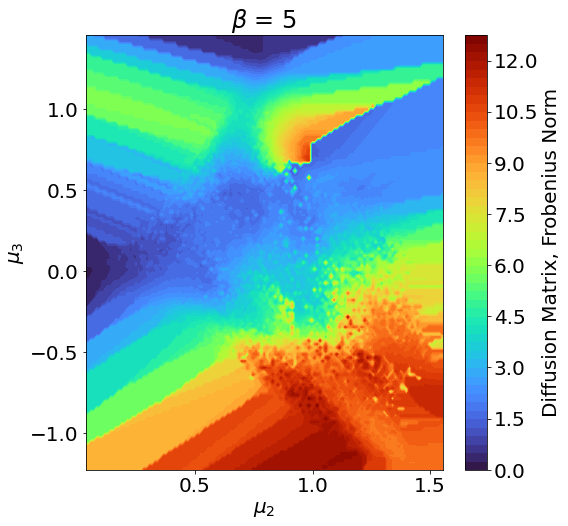

In [9]:
beta = 5
fig_name = "Figures/M_FrobNorm_LJ7in2Dbeta" + str(beta) + ".pdf"
M_FrobNorm = np.sqrt(M11_5**2+2*M12_5**2+M22_5**2)
contourf_func(M_FrobNorm,5,mu2grid,mu3grid,"Diffusion Matrix, Frobenius Norm",fig_name)

In [10]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel(r'$\mu_2$')
    plt.ylabel(r'$\mu_3$')
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    N2,N1 = np.shape(func)
    scale = 0.01
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
    plt.savefig(fig_name)

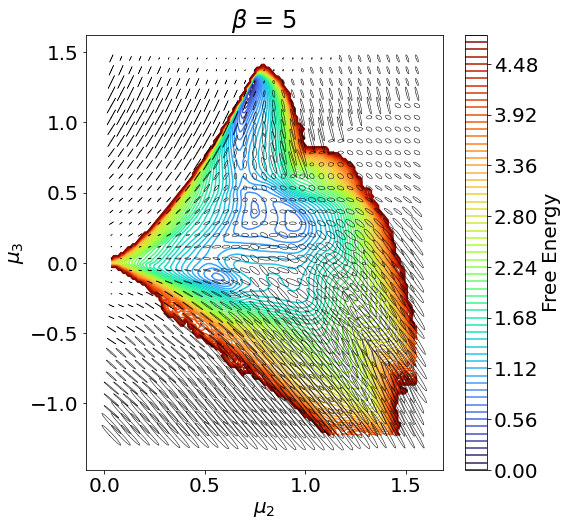

In [11]:
beta = 5
step = 4
visualize_diffusion_matrix(FE5,M11_5,M12_5,M22_5,beta,step,mu2grid,mu3grid,"Free Energy","Figures/LJ7_FE_DiffMatr_beta5.pdf")

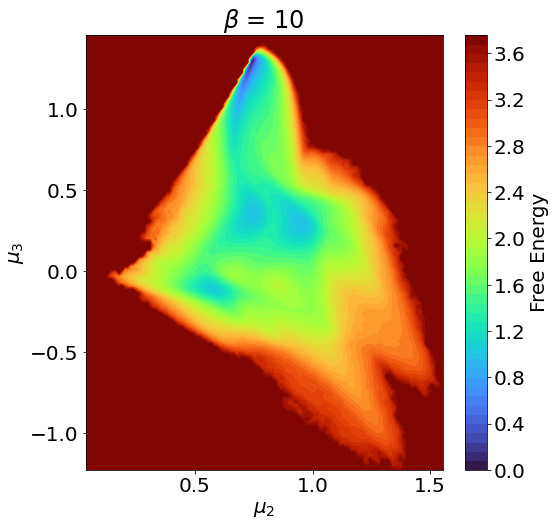

In [12]:
beta = 10
fig_name = "Figures/FE_LJ7in2Dbeta" + str(beta) + "_binning.pdf"
contourf_func(FE10,10,mu2grid,mu3grid,"Free Energy",fig_name)

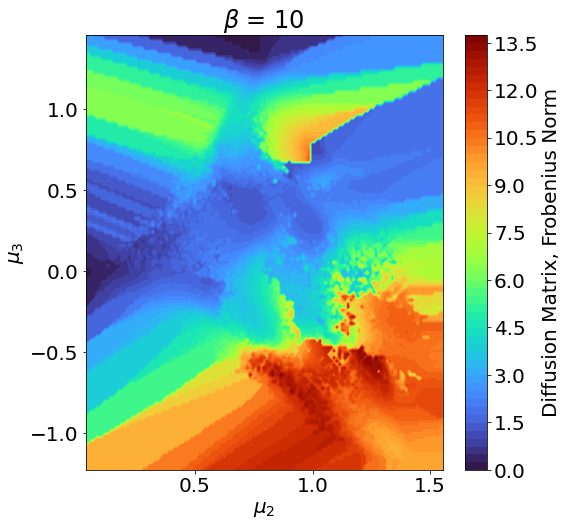

In [13]:
beta = 10
fig_name = "Figures/M_FrobNorm_LJ7in2Dbeta" + str(beta) + ".pdf"
M_FrobNorm = np.sqrt(M11_10**2+2*M12_10**2+M22_10**2)
contourf_func(M_FrobNorm,10,mu2grid,mu3grid,"Diffusion Matrix, Frobenius Norm",fig_name)

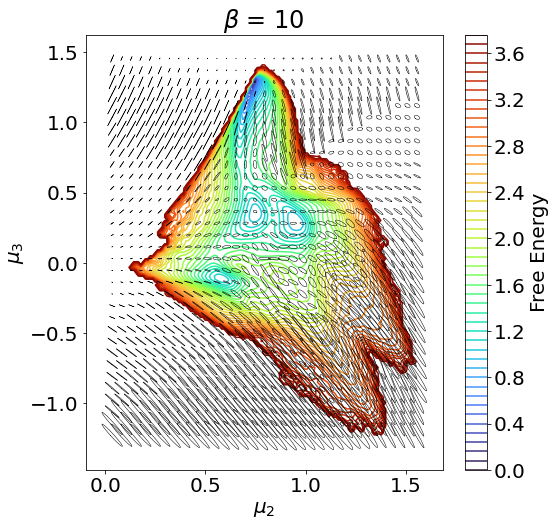

In [14]:
beta = 10
step = 4
visualize_diffusion_matrix(FE10,M11_10,M12_10,M22_10,beta,step,mu2grid,mu3grid,"Free Energy","Figures/LJ7_FE_DiffMatr_beta10.pdf")

In [15]:
# evaluate the free enegy and its gradient
def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

    for i in range(1,4):
        for j in range(4):
            grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

    for i in range(4):
        for j in range(1,4):
            grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
    grad_x = grad_x/dx
    grad_y = grad_y/dy
    
    return val,grad_x,grad_y

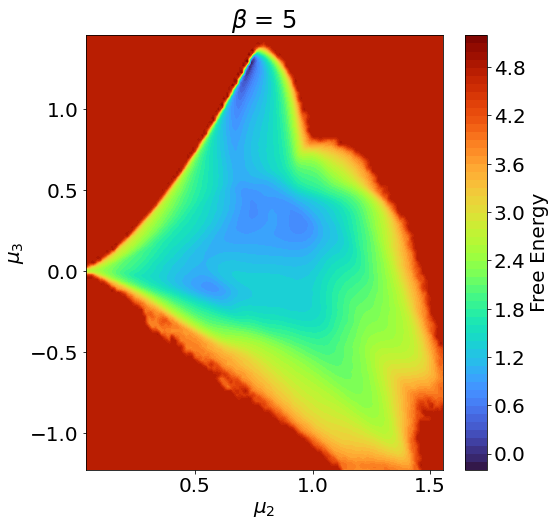

In [16]:
# evaluate the free energy and its gradient on a finer mesh
N = 200
xfine = np.linspace(val1_min,val1_max,N)
yfine = np.linspace(val2_min,val2_max,N)
FE5fine = np.zeros((N,N))
FE5grad_x_fine = np.zeros((N,N))
FE5grad_y_fine = np.zeros((N,N))

for j in range(N):
    for i in range(N):
        f,gx,gy = bicubic_interpolation(bicubic_matrix5,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        FE5fine[j,i] = f
        FE5grad_x_fine[j,i] = gx
        FE5grad_y_fine[j,i] = gy 
        

contourf_func(np.reshape(FE5fine,(N,N)),5,xfine,yfine,"Free Energy","Figures/FE5_200-by-200.pdf")

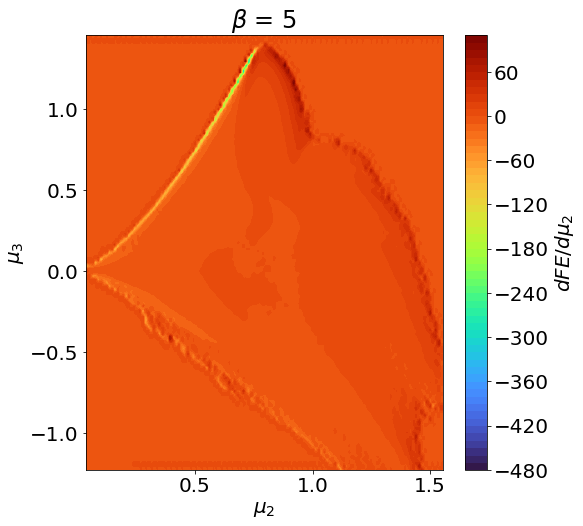

In [17]:
contourf_func(FE5grad_x_fine,5,xfine,yfine,r'$dFE/d\mu_2$',"Figures/grad_x_FE5_200-by-200.pdf")

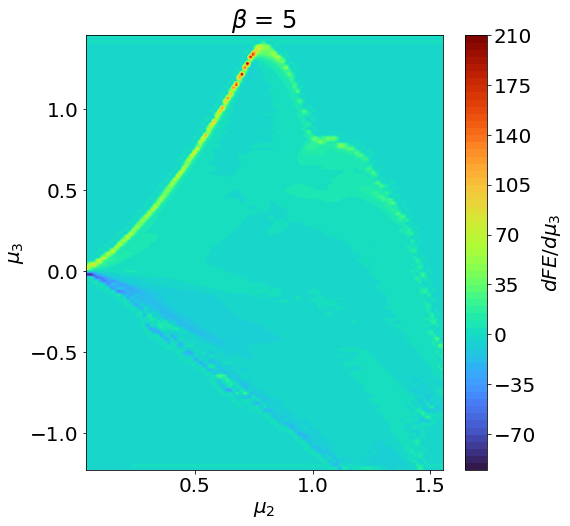

In [18]:
contourf_func(FE5grad_y_fine,5,xfine,yfine,r'$dFE/d\mu_3$',"Figures/grad_y_FE5_200-by-200.pdf")

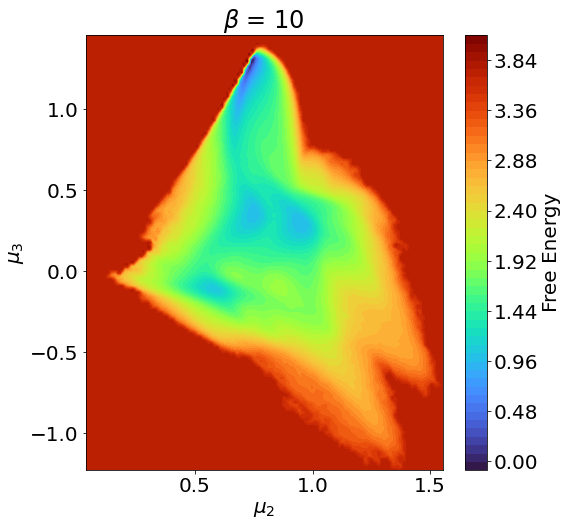

In [19]:
# evaluate the free energy and its gradient on a finer mesh
N = 200
xfine = np.linspace(val1_min,val1_max,N)
yfine = np.linspace(val2_min,val2_max,N)
FE10fine = np.zeros((N,N))
FE10grad_x_fine = np.zeros((N,N))
FE10grad_y_fine = np.zeros((N,N))

for j in range(N):
    for i in range(N):
        f,gx,gy = bicubic_interpolation(bicubic_matrix10,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        FE10fine[j,i] = f
        FE10grad_x_fine[j,i] = gx
        FE10grad_y_fine[j,i] = gy 
        

contourf_func(np.reshape(FE10fine,(N,N)),10,xfine,yfine,"Free Energy","Figures/FE10_200-by-200.pdf")

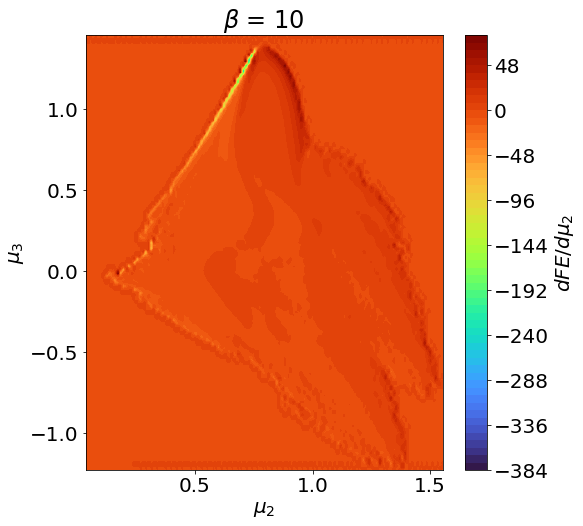

In [20]:
contourf_func(FE10grad_x_fine,10,xfine,yfine,r'$dFE/d\mu_2$',"Figures/grad_x_FE10_200-by-200.pdf")

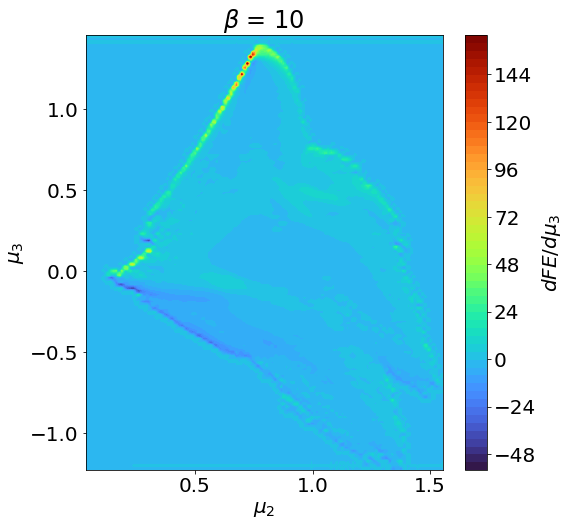

In [21]:
contourf_func(FE10grad_y_fine,10,xfine,yfine,r'$dFE/d\mu_3$',"Figures/grad_y_FE10_200-by-200.pdf")

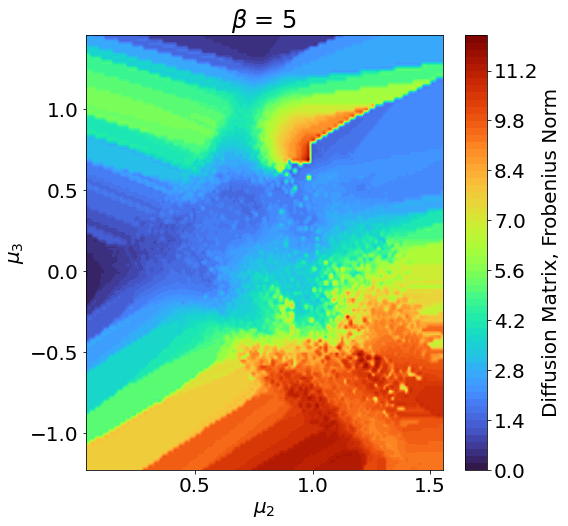

In [22]:
# evaluate the free energy and its gradient on a finer mesh
N = 200
xfine = np.linspace(val1_min,val1_max,N)
yfine = np.linspace(val2_min,val2_max,N)
M11_fine = np.zeros((N,N))
M12_fine = np.zeros((N,N))
M22_fine = np.zeros((N,N))

for j in range(N):
    for i in range(N):
        f,gx,gy = bicubic_interpolation(M11_bicubic_matrix5,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        M11_fine[j,i] = f
        f,gx,gy = bicubic_interpolation(M12_bicubic_matrix5,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        M12_fine[j,i] = f
        f,gx,gy = bicubic_interpolation(M22_bicubic_matrix5,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        M22_fine[j,i] = f 
        
M_FrobNorm_fine = np.sqrt(M11_fine**2 + M12_fine**2 + M22_fine**2)
contourf_func(np.reshape(M_FrobNorm_fine,(N,N)),5,xfine,yfine,"Diffusion Matrix, Frobenius Norm","Figures/M_beta5_200-by-200.pdf")

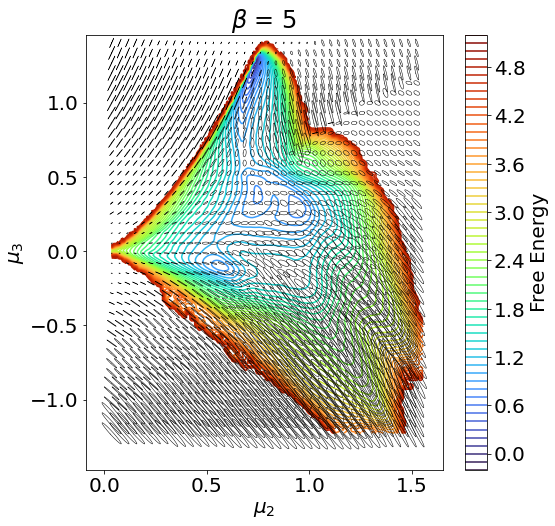

In [23]:
beta = 5
step = 5
visualize_diffusion_matrix(FE5fine,M11_fine,M12_fine,M22_fine,beta,step,xfine,yfine,"Free Energy","Figures/LJ7_FE_DiffMatr_ellipses_beta5_200-by-200.pdf")

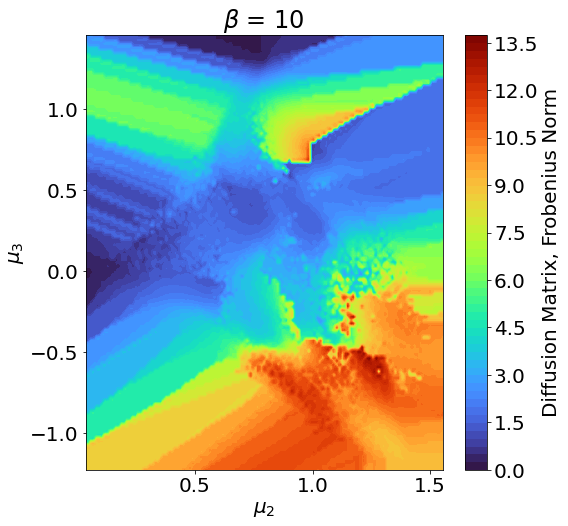

In [24]:
for j in range(N):
    for i in range(N):
        f,gx,gy = bicubic_interpolation(M11_bicubic_matrix10,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        M11_fine[j,i] = f
        f,gx,gy = bicubic_interpolation(M12_bicubic_matrix10,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        M12_fine[j,i] = f
        f,gx,gy = bicubic_interpolation(M22_bicubic_matrix10,mu2grid,mu3grid,h1,h2,xfine[i],yfine[j])
        M22_fine[j,i] = f 
        
M_FrobNorm_fine = np.sqrt(M11_fine**2 + M12_fine**2 + M22_fine**2)
contourf_func(np.reshape(M_FrobNorm_fine,(N,N)),10,xfine,yfine,"Diffusion Matrix, Frobenius Norm","Figures/M_beta10_200-by-200.pdf")

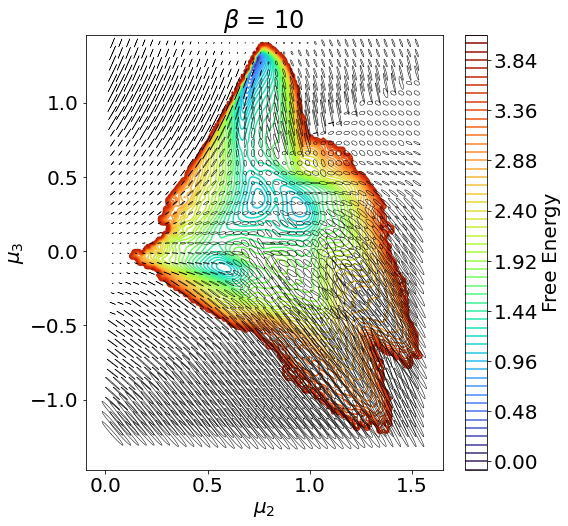

In [25]:
beta = 10
step = 5
visualize_diffusion_matrix(FE10fine,M11_fine,M12_fine,M22_fine,beta,step,xfine,yfine,"Free Energy","Figures/LJ7_FE_DiffMatr_ellipses_beta10_200-by-200.pdf")